# imports

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
insurance_df = pd.read_csv('data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# fit the model

In [4]:
# , 'children', 'smoker', 'region'
features = ['age', 'bmi']
X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           7.39e-37
Time:                        21:53:02   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.000   -9846.262   -3003.347
age          241.9308     22.298     10.850      0.000     198.187     285.674
bmi          332.9651     51.374      6.481      0.000     232.182     433.748
==============================================================================
Omnibus:                      321.874   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.574
Skew:                           1.511   Prob(JB):                    2.11e-129
Kurtosis:                       4.223   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# residual plot

<AxesSubplot:>

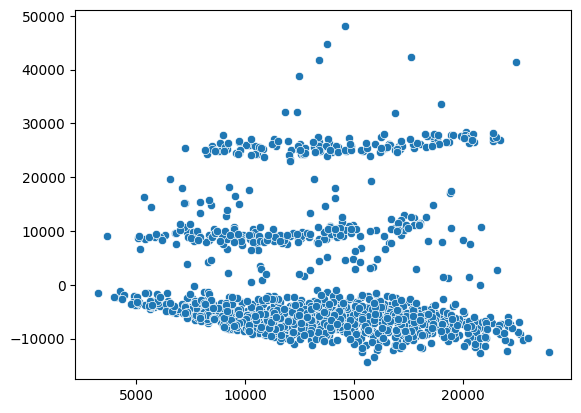

In [6]:
sns.scatterplot(x=model.predict(), y=model.resid)

# Predict

In [7]:
explanatory_vars = pd.DataFrame({
    'age': [0, insurance_df['age'].min(), insurance_df['age'].mean(), insurance_df['age'].max()],
    'bmi': [0, insurance_df['bmi'].min(), insurance_df['bmi'].mean(), insurance_df['bmi'].max()]
})
explanatory_vars

,age,bmi
0,0.000000,0.000000
1,18.000000,15.960000
2,39.207025,30.663397
3,64.000000,53.130000


In [9]:
X = sm.add_constant(explanatory_vars)
predictions = model.predict(X)
predictions

0    -6424.804612
1     3244.072239
2    13270.422265
3    26749.200448
dtype: float64